# **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# **Inserting Dataset**

In [ ]:
train = pd.read_csv("/content/data.csv")

# **Creating dataframe of data**

In [ ]:
train=pd.DataFrame(train)

# **Printing sum of Data**

In [ ]:
print(train.isnull().sum())

pixel_0000    0
pixel_0001    0
pixel_0002    0
pixel_0003    0
pixel_0004    0
             ..
pixel_1020    0
pixel_1021    0
pixel_1022    0
pixel_1023    0
character     0
Length: 1025, dtype: int64


In [ ]:
train.dtypes

pixel_0000     int64
pixel_0001     int64
pixel_0002     int64
pixel_0003     int64
pixel_0004     int64
               ...  
pixel_1020     int64
pixel_1021     int64
pixel_1022     int64
pixel_1023     int64
character     object
Length: 1025, dtype: object

# **Extracting Last column from the table**

In [ ]:
Column_name=train["character"].to_numpy()
del train["character"]

In [ ]:
Column_name

array(['character_01_ka', 'character_01_ka', 'character_01_ka', ...,
       'digit_9', 'digit_9', 'digit_9'], dtype=object)

In [ ]:
train.to_numpy(dtype='int')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train=np.array(train).astype('int')

# **Visualising Images**

In [ ]:
train.shape

(92000, 1024)

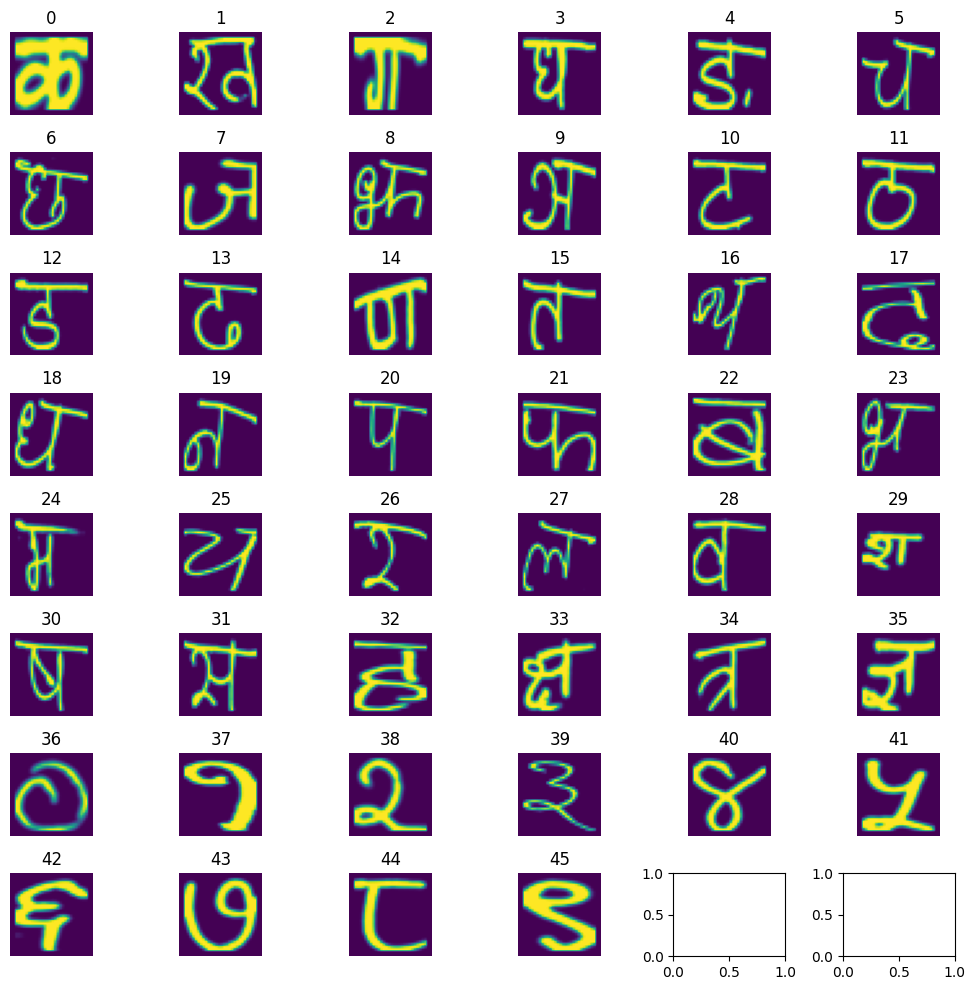

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
dict={}

count=0
#range
for i in range(0,92000,2000):
    imarray=np.array(train[i].reshape(32,32))
    dict.update({count:imarray}) 
    count=count+1
    if count >= 92000:
        break
       
figure, ax = plt.subplots(nrows=8,ncols=6,figsize=(10,10) )
for ind,title in enumerate(dict):
    ax.ravel()[ind].imshow(dict[title])
    ax.ravel()[ind].set_title(title)
    ax.ravel()[ind].set_axis_off()
plt.tight_layout()
plt.show()

# **Encoding**

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = array(Column_name)
print(values)

# integer encode

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example

inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['character_01_ka' 'character_01_ka' 'character_01_ka' ... 'digit_9'
 'digit_9' 'digit_9']
[ 0  0  0 ... 45 45 45]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['character_01_ka']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Training and Testing Data.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train.astype("float32"),onehot_encoded, test_size=0.1, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((82800, 1024), (9200, 1024), (82800, 46), (9200, 46))

In [ ]:
82800/50

1656.0

In [ ]:
9200/50

184.0

In [ ]:
X_train=(X_train.reshape(82800,32,32))/255
X_test=(X_test.reshape(9200,32,32))/255

In [ ]:
X_train.shape

(82800, 32, 32)

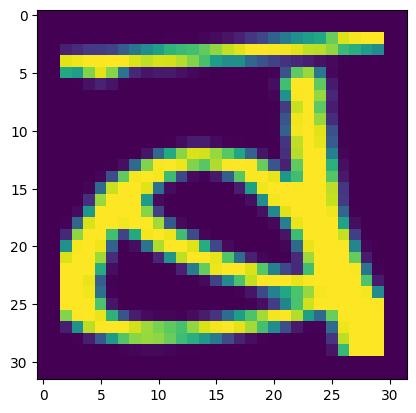

In [ ]:
plt.imshow(X_train[50])

# **Keras Model-CNN**

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,GlobalMaxPooling2D,Flatten,Dropout
from tensorflow.python.keras.models import Sequential
from keras.layers import Input

In [ ]:
model = Sequential(name="my_sequential")
model.add(Conv2D(50,(3,3),activation="relu",kernel_initializer='he_uniform', input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu",kernel_initializer='he_uniform'))
model.add(Dense(46,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 11250)             0         
_________________________________________________________________
dropout (Dropout)            (None, 11250)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2880256   
_________________________________________________________________
dense_1 (Dense)              (None, 46)                11822     
Total params: 2,892,578
Trainable params: 2,892,578
Non-trainable params: 0
___________________________________________

In [ ]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [ ]:
history=model.fit(X_train, y_train, batch_size=50, epochs=10, validation_split=None,validation_data=(X_test,y_test))

Epoch 1/10
1656/1656 [==============================] - 125s 75ms/step - loss: 0.0215 - acc: 0.9933 - val_loss: 0.1476 - val_acc: 0.9768
Epoch 2/10
1656/1656 [==============================] - 125s 75ms/step - loss: 0.0172 - acc: 0.9947 - val_loss: 0.1464 - val_acc: 0.9746
Epoch 3/10
1656/1656 [==============================] - 124s 75ms/step - loss: 0.0181 - acc: 0.9944 - val_loss: 0.1547 - val_acc: 0.9762
Epoch 4/10
1656/1656 [==============================] - 125s 76ms/step - loss: 0.0179 - acc: 0.9946 - val_loss: 0.1529 - val_acc: 0.9764
Epoch 5/10
1656/1656 [==============================] - 126s 76ms/step - loss: 0.0158 - acc: 0.9950 - val_loss: 0.1654 - val_acc: 0.9740
Epoch 6/10
1656/1656 [==============================] - 126s 76ms/step - loss: 0.0153 - acc: 0.9951 - val_loss: 0.1596 - val_acc: 0.9768
Epoch 7/10
1656/1656 [==============================] - 126s 76ms/step - loss: 0.0149 - acc: 0.9952 - val_loss: 0.1779 - val_acc: 0.9736
Epoch 8/10
1656/1656 [===================

In [ ]:
model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
)

288/288 [==============================] - 4s 12ms/step - loss: 0.1792 - acc: 0.9729


[0.17923223972320557, 0.9729347825050354]

# **Plot of Model accuracy**

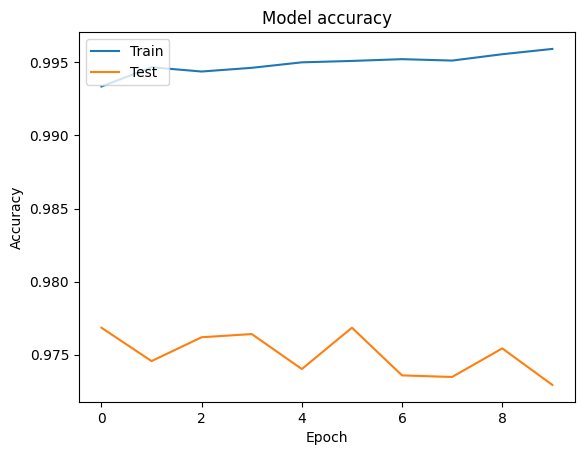

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Plot training & validation loss values**

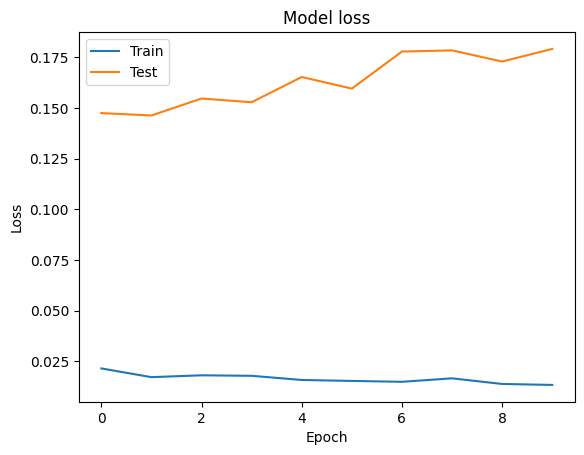

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Visualizing losses and accuracy**

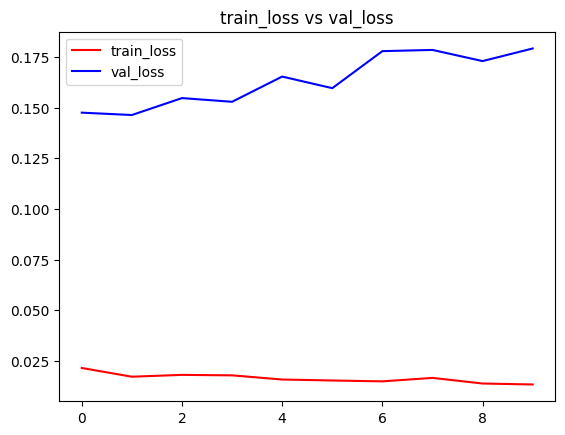

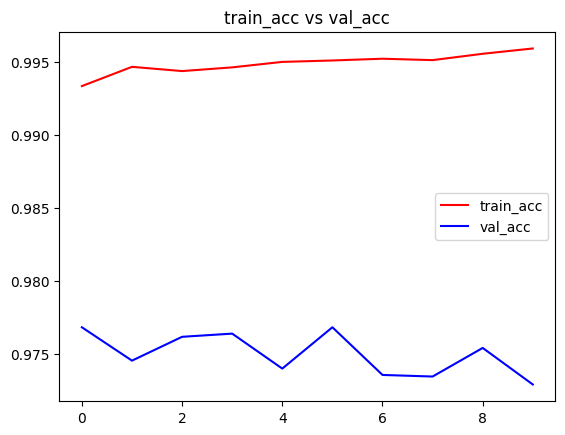

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

model.save('my_model.h5')

In [ ]:
import pandas as pd
import string
import re
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# **Prediction and Confusion Matrix**

In [ ]:
#Predicting the Test set rules
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) #greater than 0.50 on scale 0 to 1
print(y_pred)

#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


ValueError: ignored